In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

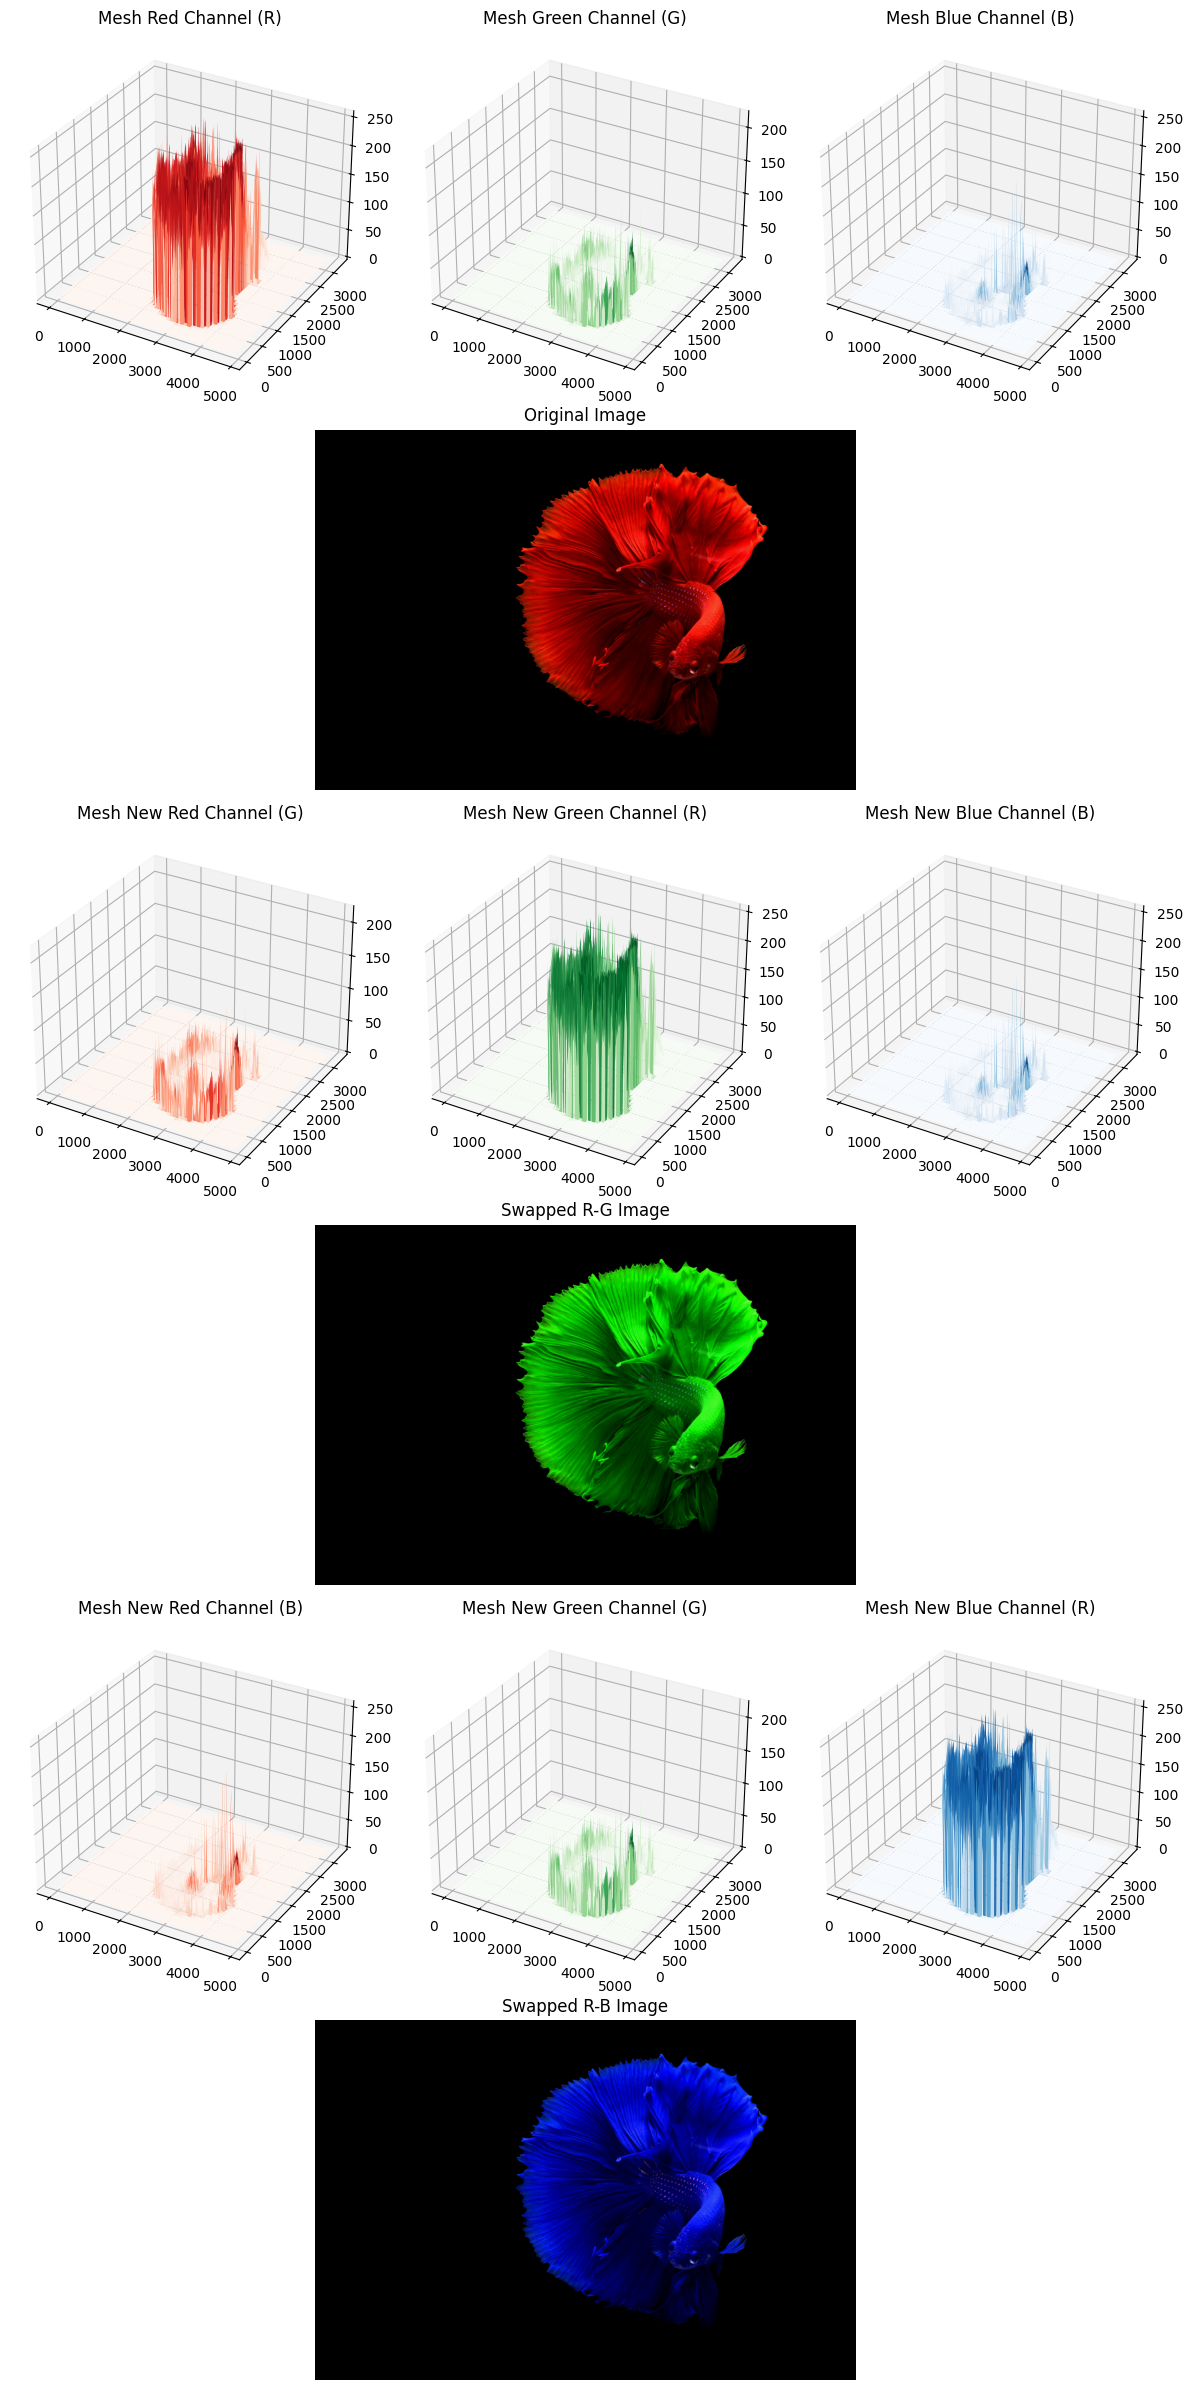

In [2]:
def plot_3d_mesh(ax, channel, title, color):
    h, w = channel.shape
    X, Y = np.meshgrid(np.arange(w), np.arange(h))
    ax.plot_surface(X, Y, channel, cmap=color)
    ax.set_title(title)

def process_image(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        print("Error reading the image")
        return
    
    # Convert image from BGR to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Extract color channels
    R, G, B = cv2.split(image)
    
    # Swap R and G channels
    swapped_image_rg = cv2.merge([G, R, B])
    swapped_R_rg, swapped_G_rg, swapped_B_rg = cv2.split(swapped_image_rg)
    
    # Swap R and B channels
    swapped_image_rb = cv2.merge([B, G, R])
    swapped_R_rb, swapped_G_rb, swapped_B_rb = cv2.split(swapped_image_rb)
    
    # Display images and mesh plots in an organized layout
    fig = plt.figure(figsize=(12, 24))
    
    # Original image
    ax4 = fig.add_subplot(6, 3, (4, 6))
    ax4.imshow(image)
    ax4.set_title("Original Image")
    ax4.axis("off")
    
    # Mesh plots for the original image
    ax1 = fig.add_subplot(6, 3, 1, projection='3d')
    plot_3d_mesh(ax1, R, "Mesh Red Channel (R)", 'Reds')
    ax2 = fig.add_subplot(6, 3, 2, projection='3d')
    plot_3d_mesh(ax2, G, "Mesh Green Channel (G)", 'Greens')
    ax3 = fig.add_subplot(6, 3, 3, projection='3d')
    plot_3d_mesh(ax3, B, "Mesh Blue Channel (B)", 'Blues')
    
    # Swapped RG image
    ax8 = fig.add_subplot(6, 3, (10, 12))
    ax8.imshow(swapped_image_rg)
    ax8.set_title("Swapped R-G Image")
    ax8.axis("off")
    
    # Mesh plots for the swapped RG image
    ax5 = fig.add_subplot(6, 3, 7, projection='3d')
    plot_3d_mesh(ax5, swapped_R_rg, "Mesh New Red Channel (G)", 'Reds')
    ax6 = fig.add_subplot(6, 3, 8, projection='3d')
    plot_3d_mesh(ax6, swapped_G_rg, "Mesh New Green Channel (R)", 'Greens')
    ax7 = fig.add_subplot(6, 3, 9, projection='3d')
    plot_3d_mesh(ax7, swapped_B_rg, "Mesh New Blue Channel (B)", 'Blues')
    
    # Swapped RB image
    ax12 = fig.add_subplot(6, 3, (16, 18))
    ax12.imshow(swapped_image_rb)
    ax12.set_title("Swapped R-B Image")
    ax12.axis("off")
    
    # Mesh plots for the swapped RB image
    ax9 = fig.add_subplot(6, 3, 13, projection='3d')
    plot_3d_mesh(ax9, swapped_R_rb, "Mesh New Red Channel (B)", 'Reds')
    ax10 = fig.add_subplot(6, 3, 14, projection='3d')
    plot_3d_mesh(ax10, swapped_G_rb, "Mesh New Green Channel (G)", 'Greens')
    ax11 = fig.add_subplot(6, 3, 15, projection='3d')
    plot_3d_mesh(ax11, swapped_B_rb, "Mesh New Blue Channel (R)", 'Blues')
    
    plt.tight_layout()
    plt.show()
    
    # Save the output images
    cv2.imwrite(output_path.replace('.jpg', '_RG.jpg'), cv2.cvtColor(swapped_image_rg, cv2.COLOR_RGB2BGR))
    cv2.imwrite(output_path.replace('.jpg', '_RB.jpg'), cv2.cvtColor(swapped_image_rb, cv2.COLOR_RGB2BGR))

# Use the function
image_path = 'data/image (3).jpg'  # Path to input image
output_path = 'output/output(3).jpg'  # Path to save output images
process_image(image_path, output_path)

In [ ]:
# finish